<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [69]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [70]:
# todo
df = pd.read_csv('dataset.csv')
print(df.head(5))

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [71]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [72]:
# todo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer:
<br>
In this dataset, the column most likely to be irrelevant for PCA and clustering is CUST_ID. This column typically serves as a unique identifier for each customer and doesn’t provide any information about customer behavior or spending patterns. Including it in PCA or clustering would add unnecessary noise, as it doesn’t contribute to the variance or underlying structure of the data.

In [73]:
# Exclude irrelevant feature
df = df.drop(columns=['CUST_ID'])
print(df.head(5))

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

how do you handle missing data, and why did you choose this method?
<br>
Answer:
<br>
I handle missing data with mean of the columns. By replacing missing values with the mean, the overall mean of the feature does not change, which is important for maintaining the distribution characteristics of the data.

In [74]:
#Fill missing data
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64


In [75]:
# Fill missing values in each column with the column's mean
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

# Check if missing values are filled
missing_values_after = df.isnull().sum()
print("Missing values after filling:", missing_values_after[missing_values_after > 0])

Missing values after filling: Series([], dtype: int64)


<ipython-input-75-16b8fe7c4981>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
<ipython-input-75-16b8fe7c4981>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

plot the correlation matrix and identify redundant features.remove them from the dataframe.

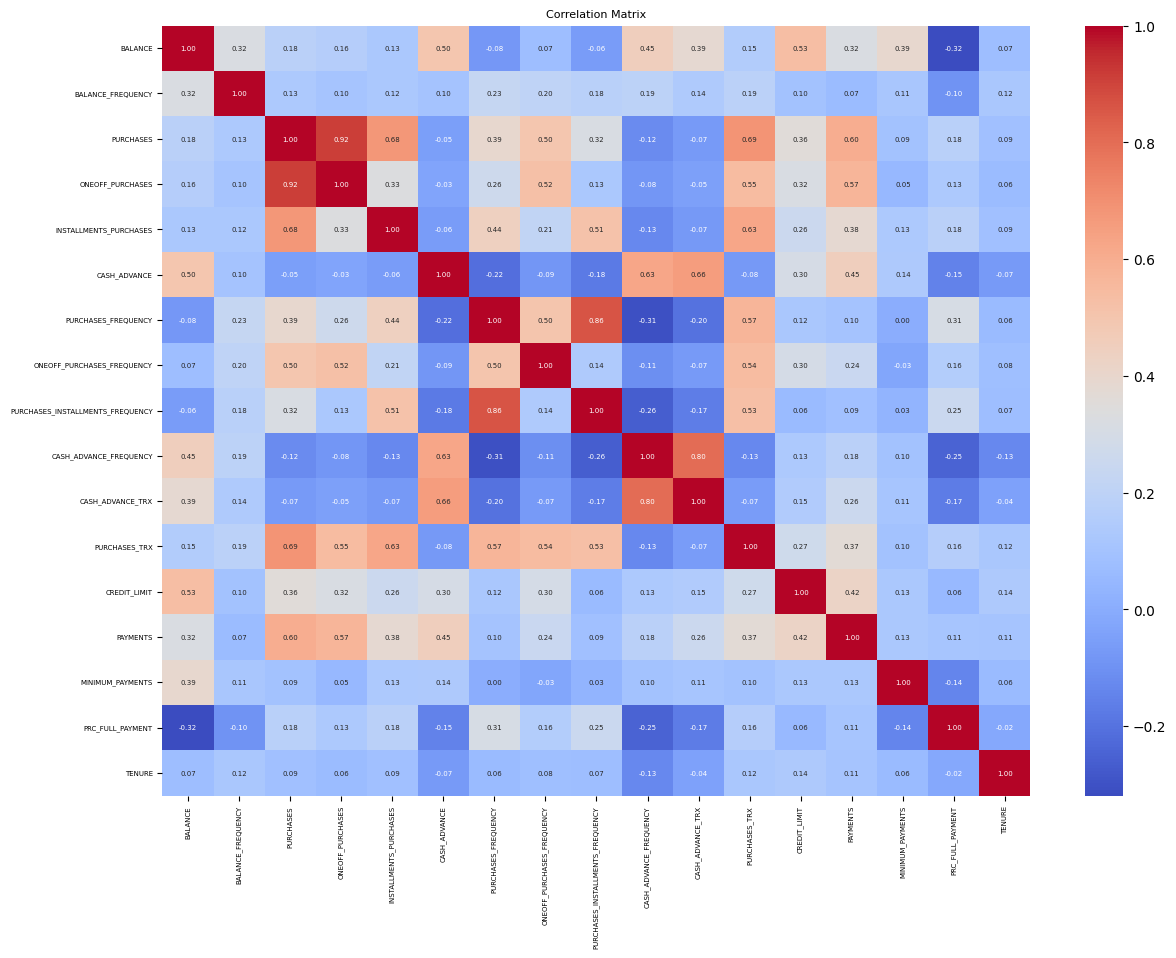

In [76]:
# Plot the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 5}
)
plt.xticks(rotation=90,fontsize=5)
plt.yticks(rotation=0,fontsize=5)
plt.title("Correlation Matrix", fontsize=8)
plt.show()


In [77]:
# Identify and remove redundant features. use 0.8 threshold.
threshold = 0.8
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
redundant_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

df = df.drop(columns=redundant_features)
print("Removed redundant features:", redundant_features)
df.head(5)

Removed redundant features: ['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.4,0.000000,0.166667,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [78]:
# todo
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
standardized_df


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.132643,-0.466786,1.269843,-0.678661,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.122823,-0.466786,1.269843,-0.678661,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.294893,-0.466786,0.854576,-0.678661,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.454576,-0.449352,-1.221758,-0.678661,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469065e-01,0.329200,-4.122768


Why is it important to standardize the data before applying PCA?
<br>
Answer:
<br>
- PCA is sensitive to the variances of the original variables. If the features are on different scales, PCA may end up giving more weight to variables with larger ranges. Standardizing ensures that each feature contributes equally to the analysis.
- Standardization transforms the data to a standard normal distribution (mean = 0, standard deviation = 1). This uniformity helps in interpreting the results of PCA since each variable's influence can be compared directly.

- Without standardization, features with larger numerical ranges can dominate the principal components. This can lead to misleading results, where the principal components may represent only those features instead of a balanced representation of all features.
<br>
---

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer:

StandardScaler classes:

- Standardizes features by removing the mean and scaling to unit variance (z-score normalization).

- For each feature 𝑥, the transformation is:</br>
𝑧 = (𝑥 − 𝜇) / 𝜎
</br>where 𝜇 is the mean and 𝜎 is the standard deviation of the feature.
- Use Case: Best suited for algorithms that assume a Gaussian distribution of the data and are sensitive to the scale of the input features (e.g., PCA, linear regression).

Normalizer:

-  Scales individual samples (rows) to have unit norm (length). It does not transform features; rather, it transforms each sample vector to have a length of 1.

- For a vector 𝑥, the transformation is:
</br> 𝑥′= 𝑥 / ∥𝑥∥
</br>where ∥𝑥∥ is the norm of 𝑥

- Use Case: Commonly used in text classification and clustering where the direction of the data is more important than its magnitude.


## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [79]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)
        X_meaned = X - self.mean
        covariance_matrix = np.cov(X_meaned, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[:, sorted_index]

        if self.n_components is not None:
            self.components = sorted_eigenvectors[:, :self.n_components]
        else:
            self.components = sorted_eigenvectors

        X_reduced = np.dot(X_meaned, self.components)
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = eigenvalues[sorted_index][:self.n_components] / total_variance if self.n_components is not None else eigenvalues[sorted_index] / total_variance

        return X_reduced



    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        # Return the transformed data
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer:
We need 6 components to explain approximately 75% of the variance, but I will continue with 5 components...

In [80]:
# todo
pca = CustomPCA(n_components=None)  # Fit all components
pca.fit(standardized_data)

explained_variance = pca.get_explained_variance_ratio()
cumulative_variance = (np.cumsum(explained_variance))*100
cumulative_variance = np.round(cumulative_variance, 1)
cumulative_variance

array([ 25.4,  47.6,  56.3,  63.9,  70.5,  76.1,  81.4,  85.8,  89.5,
        92.6,  94.6,  96.3,  97.8,  99. , 100. ])

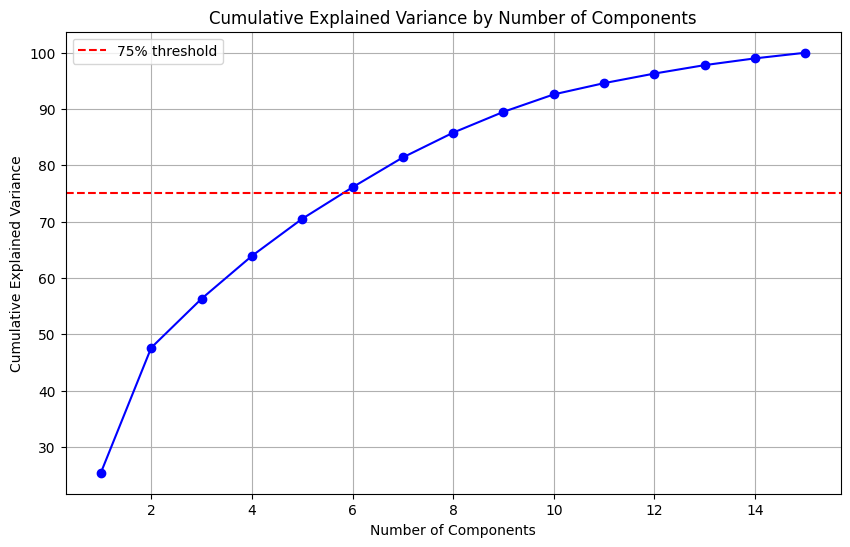

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.axhline(y=75, color='r', linestyle='--', label='75% threshold')
plt.legend()
plt.grid(True)
plt.show()


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [82]:
#Build a new DataFrame with the first slected components
n_components = 5

pca_selected = CustomPCA(n_components=n_components)
pca_selected.fit(standardized_data)
pca_transformed_data = pca_selected.transform(standardized_data)

pca_df = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df.head(5)

,PC1,PC2,PC3,PC4,PC5
0,1.728541,0.833445,-0.384363,-0.429897,-0.118070
1,0.312835,-2.531537,0.615274,-0.912451,-0.845063
2,-1.197318,0.883804,-1.177909,1.172951,-1.072885
3,0.904752,-0.002158,-0.236403,-1.354837,-0.441498
4,1.498611,0.526780,-0.787691,-0.088656,-0.275036


In [83]:
pca_df.to_csv('pca_output.csv', index=False)

We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

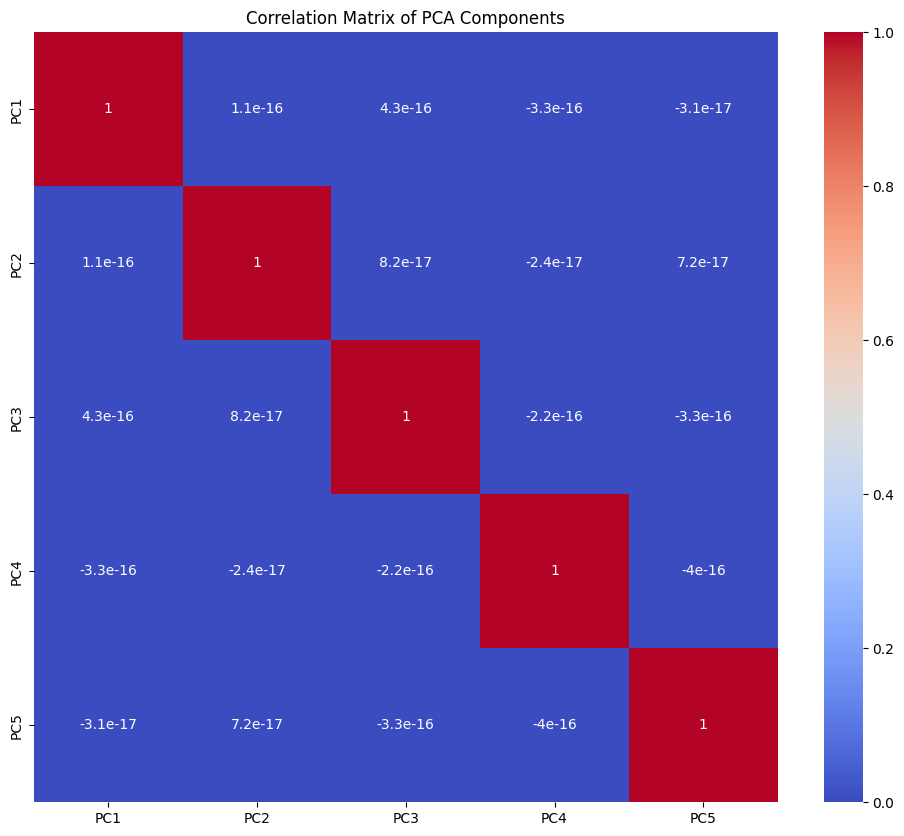

In [84]:
# todo
correlation_matrix = pca_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of PCA Components")
plt.show()


## KMeans (45 points)
Implement kmeans from scratch.

In [85]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for i in range(self.max_iter):
            self.labels_ = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)
            new_centroids = np.array([X[self.labels_ == j].mean(axis=0) for j in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.inertia_ = self._calculate_inertia(X)

        return self


    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia
        inertia = np.sum((X - self.centroids[self.labels_]) ** 2)
        return inertia


### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [86]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(pca_transformed_data)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

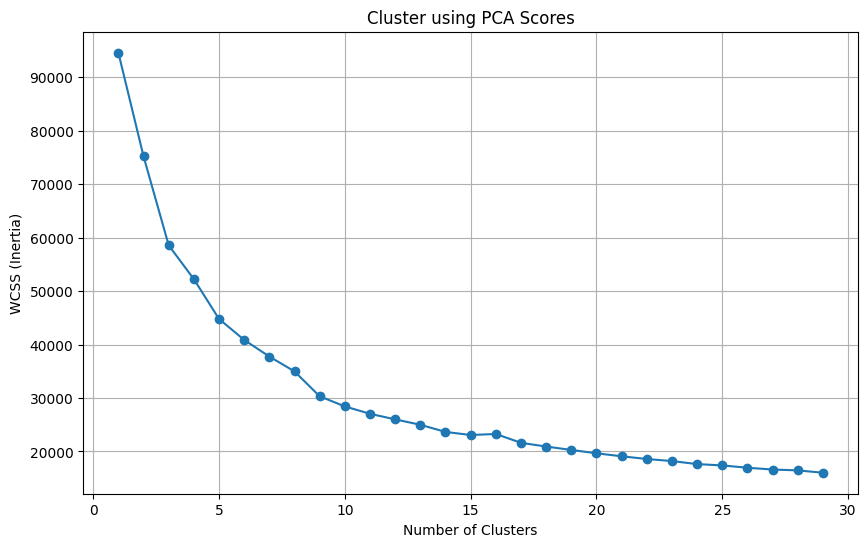

In [87]:
# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), WCSS, marker='o')
plt.title('Cluster using PCA Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [88]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
optimal_clusters = 5

kmeans_optimal = CustomKMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(pca_transformed_data)

# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
pca_df['segment'] = kmeans_optimal.labels_
pca_df

,PC1,PC2,PC3,PC4,PC5,segment
0,1.728541,0.833445,-0.384363,-0.429897,-0.118070,2
1,0.312835,-2.531537,0.615274,-0.912451,-0.845063,1
2,-1.197318,0.883804,-1.177909,1.172951,-1.072885,3
3,0.904752,-0.002158,-0.236403,-1.354837,-0.441498,2
4,1.498611,0.526780,-0.787691,-0.088656,-0.275036,2
...,...,...,...,...,...,...
8945,1.035330,1.548182,1.599155,1.822628,3.014405,0
8946,1.183454,1.116383,0.674153,1.660323,3.412244,0
8947,1.501362,1.320687,1.487909,1.316934,3.111224,0
8948,2.345434,0.282147,1.765303,0.936015,2.983191,0


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

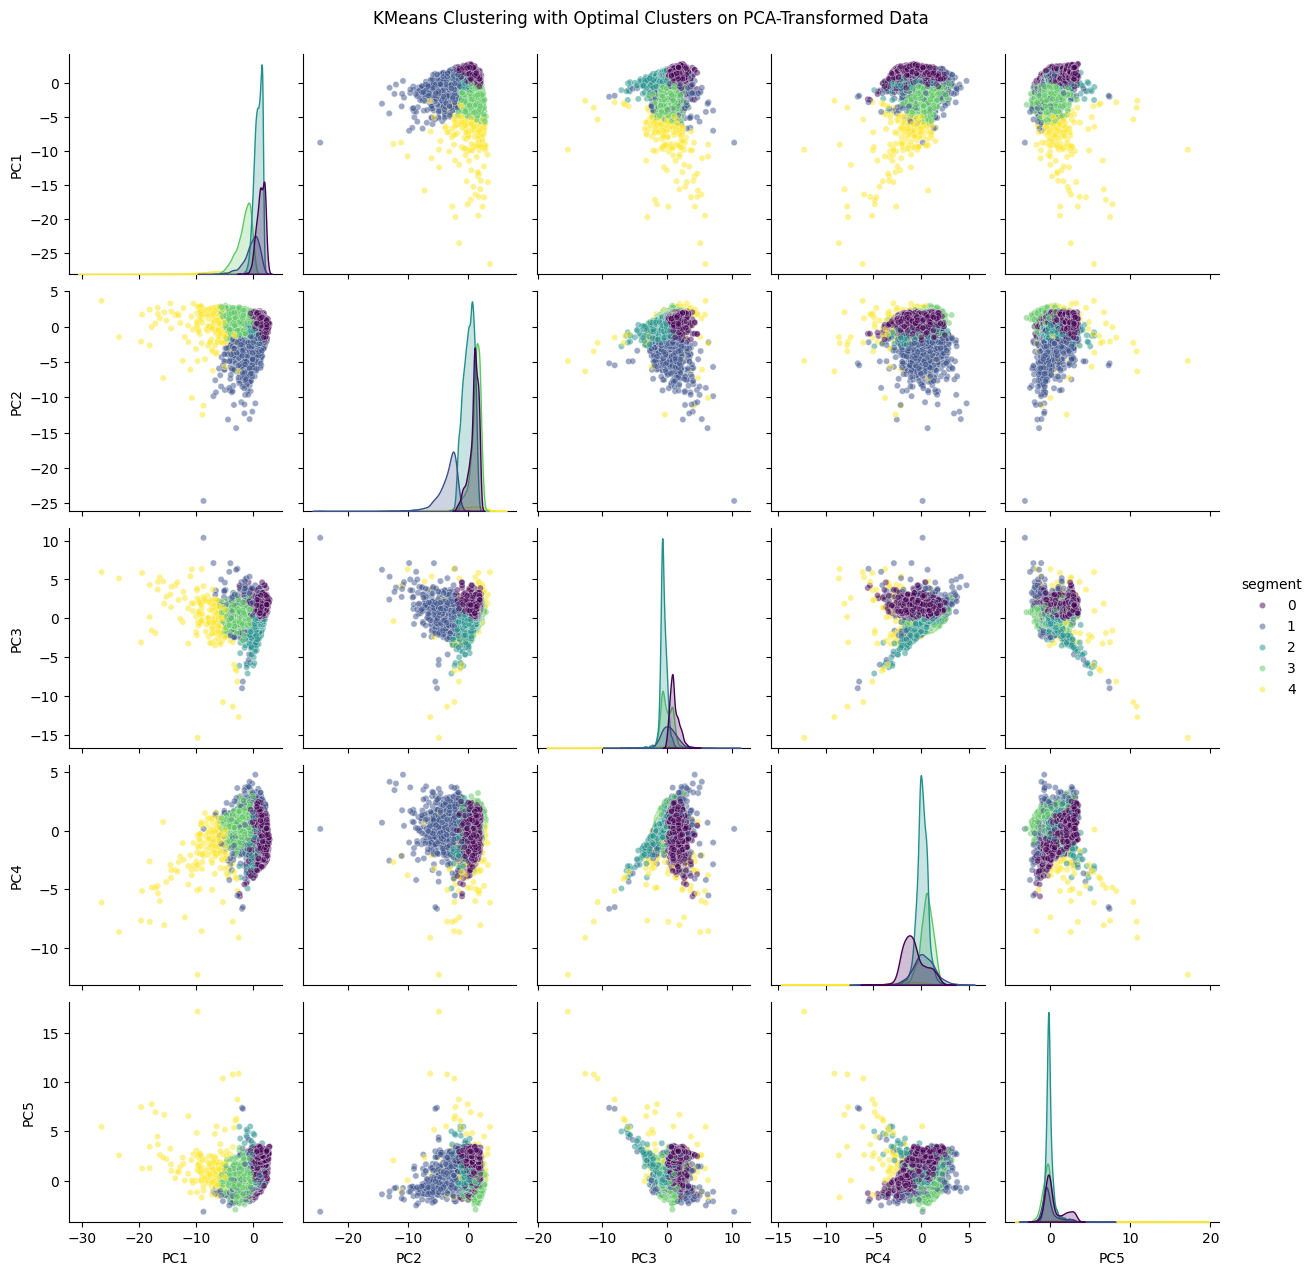

In [89]:
# todo
sns.pairplot(pca_df, hue='segment', palette='viridis', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('KMeans Clustering with Optimal Clusters on PCA-Transformed Data', y=1.02)
plt.show()


So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


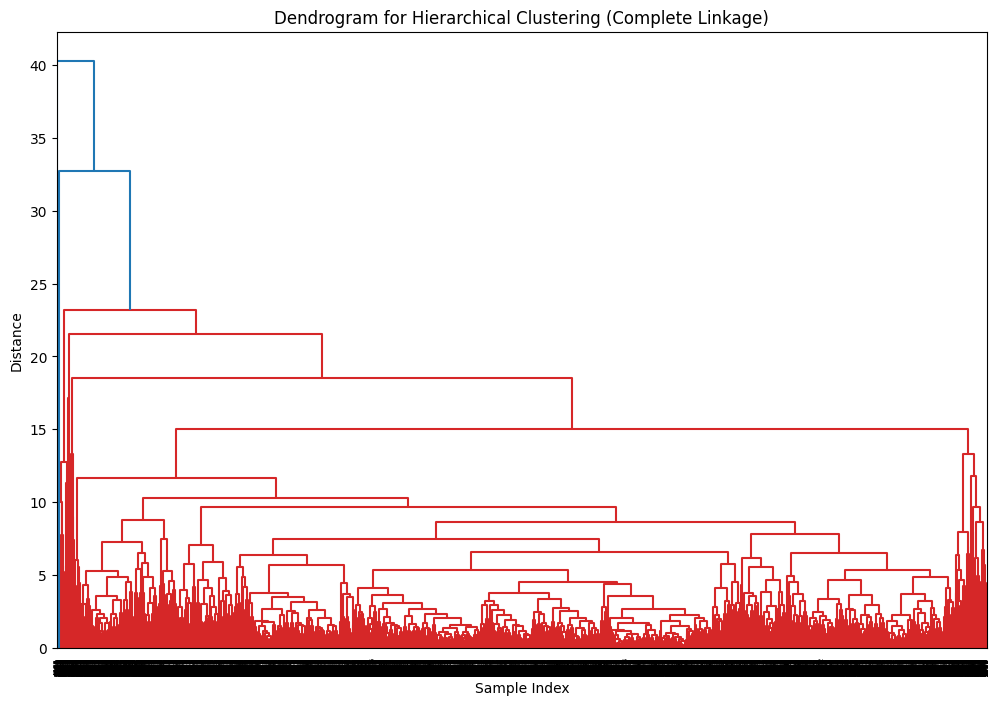

In [90]:
# Perform Hierarchical Clustering on the pca dataset
# Visualize the dendrogram

Z = linkage(pca_transformed_data, method='complete')

plt.figure(figsize=(12, 8))
plt.title("Dendrogram for Hierarchical Clustering (Complete Linkage)")
dendrogram(Z)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

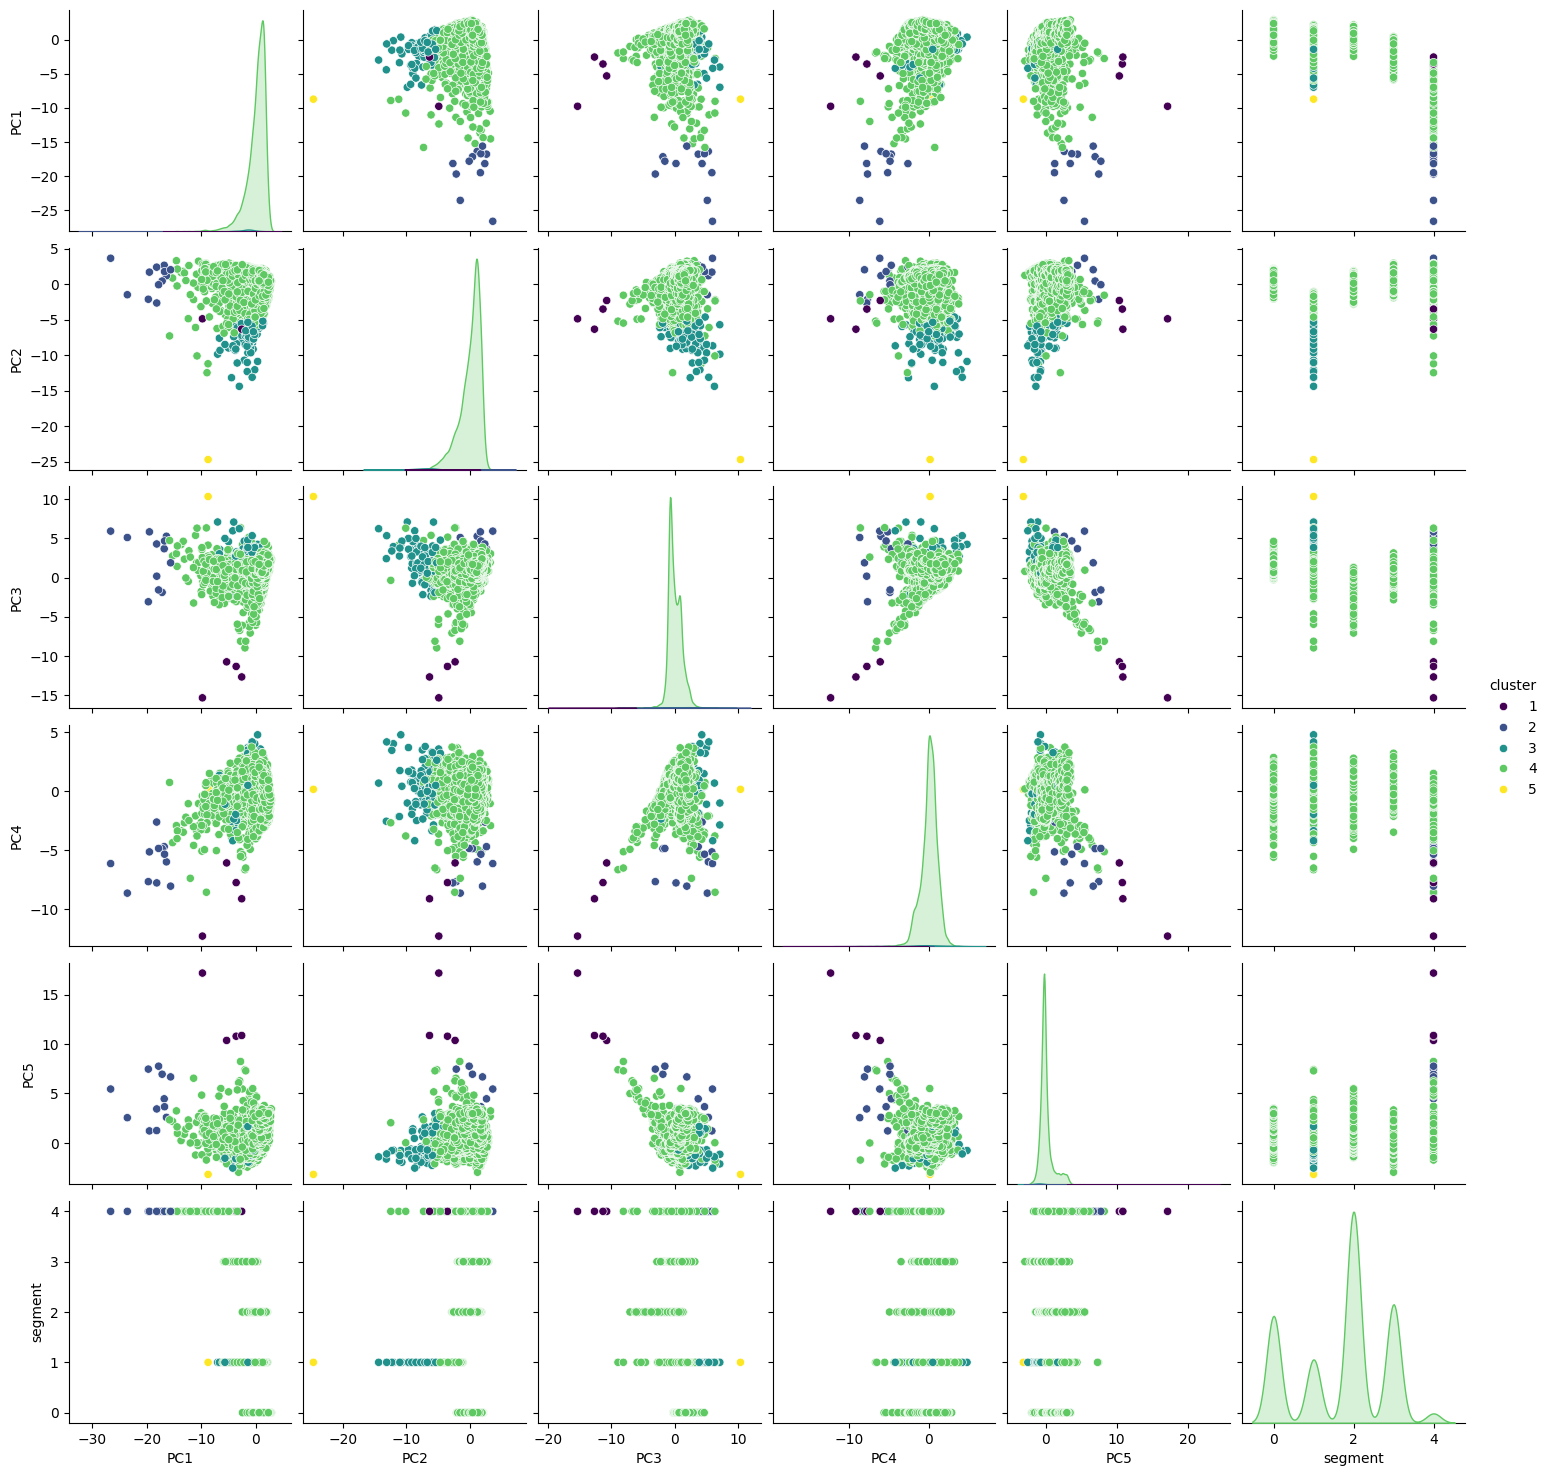

In [91]:
# Choose threshold and assign clusters
threshold = Z[len(Z) - 5, 2]
# Assign cluster labels to PCA DataFrame
cluster_labels = fcluster(Z, threshold, criterion='distance')
pca_df['cluster'] = cluster_labels
# Visualize using PCA components
sns.pairplot(pca_df, hue='cluster', diag_kind='kde', palette='viridis')
plt.show()
